In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import sys

src_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)


from gratis_precip.models import ARMAComponent
from gratis_precip.generator import PrecipitationGenerator
from gratis_precip.features import *

In [2]:
# Load your precipitation data
# For this example, we'll create some dummy data
np.random.seed(42)
dates = pd.date_range(start='1/1/2000', end='12/31/2010', freq='D')
precipitation = pd.Series(np.random.gamma(2, 1, len(dates)), index=dates)

In [3]:
# Initialize FeatureExtractor with your features
feature_extractor = FeatureExtractor([
    TotalPrecipitation(),
    PrecipitationIntensity(),
    DrySpellDuration(),
    WetSpellDuration(),
    PrecipitationVariability(),
    ExtremePrecipitationFrequency(),
    MaximumDailyPrecipitation(),
    WetDayFrequency(),
    LengthFeature(),
    NPeriodsFeature(),
    PeriodsFeature(),
    ACFFeature(),
    PACFFeature(),
    EntropyFeature(),
    NonlinearityFeature(),
    HurstFeature(),
    StabilityFeature(),
    LumpinessFeature(),
    SpikeFeature(),
    LinearityFeature(),
    CurvatureFeature(),
])

# Extract features and project to 2D
projected_vector = feature_extractor.extract_features_as_vector(precipitation)

projected_vector

Feature vector shape: (1, 27)


ValueError: perplexity must be less than n_samples

In [ ]:
# Initialize the PrecipitationGenerator
pg = PrecipitationGenerator()

# Add ARMA models to the generator
pg.add_model(ARMAComponent(order=(1,1)))
pg.add_model(ARMAComponent(order=(2,1)))

# Fit the model with your data
pg.fit(precipitation, 90)

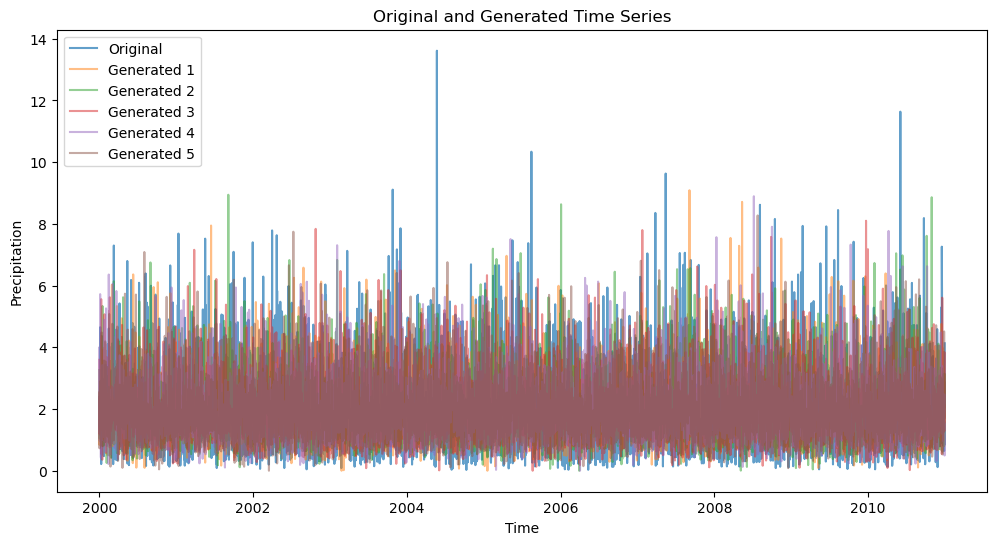

In [ ]:
# Generate synthetic data
synthetic_data = pg.generate(n_trajectories=5)

# Plot the original and synthetic time series
pg.plot_time_series()

In [ ]:
# Optimize weights to match target features
pg.optimize_weights()

# Generate new synthetic data after optimization
optimized_synthetic_data = pg.generate(n_trajectories=5)

# Plot the results in feature space
pg.plot_results()

/opt/anaconda3/envs/gratis_precip/lib/python3.12/site-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/opt/anaconda3/envs/gratis_precip/lib/python3.12/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated 

AttributeError: 'Pandas' object has no attribute 'values'

In [ ]:
# Get a summary of the current models and their weights
model_summary = pg.get_model_summary()
print("Model Summary:")
for order, weight in model_summary.items():
    print(f"ARMA{order}: weight = {weight:.3f}")

In [ ]:
# Compare some statistics between original and synthetic data
print("\nStatistics Comparison:")
print("Original Data:")
print(precipitation.describe())
print("\nSynthetic Data (first trajectory):")
print(optimized_synthetic_data.iloc[:, 0].describe())

In [ ]:
# Plot the optimized synthetic time series
pg.plot_time_series()

In [ ]:
# You can continue to add or remove models and regenerate data as needed
pg.add_model(ARMAComponent(order=(1,2)))
pg.remove_model(0)  # Remove the first model

# Refit and regenerate
pg.fit(precipitation)
pg.optimize_weights()
final_synthetic_data = pg.generate(n_trajectories=5)

# Plot the final results
pg.plot_results()
pg.plot_time_series()